<a href="https://colab.research.google.com/github/pmota13/3dsurface_python/blob/main/dash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import math
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [ ]:
%matplotlib inline

In [ ]:
!git clone https://github.com/pmota13/3dsurface_python
#https://github.com/pmota13/3dsurface_python
%cd 3dsurface_python

Cloning into '3dsurface_python'...
remote: Enumerating objects: 63, done.
remote: Total 63 (delta 0), reused 0 (delta 0), pack-reused 63
Unpacking objects: 100% (63/63), done.
/content/3dsurface_python/3dsurface_python/3dsurface_python


In [ ]:
# leitura dos dados CaCl2
#dens=np.loadtxt('densCa.txt')
#flow=np.loadtxt('flowCa.txt')
#incr10=np.loadtxt('salCa_10.txt')
#incr25=np.loadtxt('salCa_25.txt')
#incr50=np.loadtxt('salCa_50.txt')
#incr75=np.loadtxt('salCa_75.txt')
#incr100=np.loadtxt('salCa_100.txt')

In [ ]:
# leitura dos dados NaCl
dens=np.loadtxt('dens.txt')
flow=np.loadtxt('flow.txt')
incr10=np.loadtxt('salmouraincr_10.txt')
incr25=np.loadtxt('salmouraincr_25.txt')
incr50=np.loadtxt('salmouraincr_75.txt')
incr75=np.loadtxt('salmouraincr_75_1.txt')
incr100=np.loadtxt('salmouraincr_100.txt')


In [ ]:
#Cálculo da salinindade para uma condição de descarte
#Inserir densidade
#rho_input= 1333.0
#Inserir vazão
#vazao_input= 676.0
x_d = dens.size
x_fr = flow.size

dens_input= 1165
pos_d = (dens_input-1054.99999)/2.4
dens_pos_down = math.floor(pos_d)
dens_pos_up = math.ceil(pos_d)

dens_up=dens[dens_pos_down]
dens_down=dens[dens_pos_up]

flowrate_input = 1112
pos_fr = (flowrate_input-500)/(700/90)
fr_pos_down = math.floor(pos_fr)
fr_pos_up = math.ceil(pos_fr)

fr_up=flow[fr_pos_down]
fr_down=flow[fr_pos_up]

# para 10m
salinity_up10=incr10[dens_pos_up,fr_pos_up]
salinity_down10=incr10[dens_pos_down,fr_pos_down]
salinity_result10= salinity_down10-(salinity_down10-salinity_up10)*(fr_down-flowrate_input)/(fr_down-fr_up)

# para 25 m
salinity_up25=incr25[dens_pos_up,fr_pos_up]
salinity_down25=incr25[dens_pos_down,fr_pos_down]
salinity_result25= salinity_down25-(salinity_down25-salinity_up25)*(fr_down-flowrate_input)/(fr_down-fr_up)

# para 50 m
salinity_up50=incr50[dens_pos_up,fr_pos_up]
salinity_down50=incr50[dens_pos_down,fr_pos_down]
salinity_result50= salinity_down50-(salinity_down50-salinity_up50)*(fr_down-flowrate_input)/(fr_down-fr_up)

# para 75 m
salinity_up75=incr75[dens_pos_up,fr_pos_up]
salinity_down75=incr75[dens_pos_down,fr_pos_down]
salinity_result75= salinity_down75-(salinity_down75-salinity_up75)*(fr_down-flowrate_input)/(fr_down-fr_up)

# para 100 m
salinity_up100=incr100[dens_pos_up,fr_pos_up]
salinity_down100=incr100[dens_pos_down,fr_pos_down]
salinity_result100= salinity_down100-(salinity_down100-salinity_up100)*(fr_down-flowrate_input)/(fr_down-fr_up)

print('Incremento de salninidade - 10,0m',salinity_result10)
print('Incremento de salninidade - 25,0m',salinity_result25)
print('Incremento de salninidade - 50,0m',salinity_result50)
print('Incremento de salninidade - 75,0m',salinity_result75)
print('Incremento de salninidade - 100,0m',salinity_result100)

Incremento de salninidade - 10,0m 20.10649199594891
Incremento de salninidade - 25,0m 11.419027697771607
Incremento de salninidade - 50,0m 7.42828649872346
Incremento de salninidade - 75,0m 2.5001937440860513
Incremento de salninidade - 100,0m 1.3515866833026093


In [ ]:
#encontrar o menor valor de salinidade e vazão ótima para o descarte de salmoura de densidade informada 
dens_input_2 = 1165
pos_d_2 = (dens_input_2-1054.9999)/2.4
dens_pos_down_2 = math.floor(pos_d_2)
dens_pos_up_2 = math.ceil(pos_d_2)
dens_up_2 = dens[dens_pos_down_2]
dens_down_2 = dens[dens_pos_up_2]
p=1
output_salinity_100=10000.0
output_salinity_75=10000.0
output_salinity_50=10000.0
output_salinity_25=10000.0
output_salinity_10=10000.0

while p < dens.size:
  #calculo de salinidade para cada vazão para 100m
  #pos_fr = (flowrate_input-500)/(700/90)
  fr_pos_fr_2 = flow[p]

  #Distância de 100.0 m
  salinity_up100_2 = incr100[dens_pos_up_2,p]
  salinity_down100_2 = incr100[dens_pos_down_2,p]
  salinity_result100_2 = salinity_down100_2+(salinity_up100_2-salinity_down100_2)*(dens_input_2-dens_down_2)/(dens_up_2-dens_down_2)

  if (salinity_result100_2 <= output_salinity_100):
     output_salinity_100 = salinity_result100_2
     minor_value_position100 = p
     minor_flow_rate100 = flow[p]

  #Distância de 75.0 m
  salinity_up75_2 = incr75[dens_pos_up_2,p]
  salinity_down75_2 = incr75[dens_pos_down_2,p]
  salinity_result75_2 = salinity_down75_2+(salinity_up75_2-salinity_down75_2)*(dens_input_2-dens_down_2)/(dens_up_2-dens_down_2)

  if (salinity_result75_2 <= output_salinity_75):
     output_salinity_75 = salinity_result100_2
     minor_value_position75 = p
     minor_flow_rate75 = flow[p]

  #Distância de 50.0 m
  salinity_up50_2 = incr50[dens_pos_up_2,p]
  salinity_down50_2 = incr50[dens_pos_down_2,p]
  salinity_result50_2 = salinity_down50_2+(salinity_up50_2-salinity_down50_2)*(dens_input_2-dens_down_2)/(dens_up_2-dens_down_2)

  if (salinity_result50_2 <= output_salinity_50):
     output_salinity_50 = salinity_result50_2
     minor_value_position50 = p
     minor_flow_rate50 = flow[p]

  #Distância de 25.0 m
  salinity_up25_2 = incr25[dens_pos_up_2,p]
  salinity_down25_2 = incr25[dens_pos_down_2,p]
  salinity_result25_2 = salinity_down25_2+(salinity_up25_2-salinity_down25_2)*(dens_input_2-dens_down_2)/(dens_up_2-dens_down_2)

  if (salinity_result25_2 <= output_salinity_25):
     output_salinity_25 = salinity_result25_2
     minor_value_position25 = p
     minor_flow_rate25 = flow[p]

  #Distância de 10.0 m 
  salinity_up10_2 = incr10[dens_pos_up_2,p]
  salinity_down10_2 = incr10[dens_pos_down_2,p]
  salinity_result10_2 = salinity_down10_2+(salinity_up10_2-salinity_down10_2)*(dens_input_2-dens_down_2)/(dens_up_2-dens_down_2)

  if (salinity_result10_2 <= output_salinity_10):
     output_salinity_10 = salinity_result10_2
     minor_value_position10 = p
     minor_flow_rate10 = flow[p] 

     
  p=p+1

print('Menor impacto ambiental aos 100 m para a densidade especificada')
print('   Distância - 100,0 m')
print('   Incremento de salinidade - ',output_salinity_100)
print('   Vazão ótima - ',minor_flow_rate100)

#print('Menor impacto ambiental aos 75 m para a densidade especificada')
#print('   Distância - 75,0 m')
#print('   Incremento de salinidade - ',output_salinity_75)
#print('   Vazão ótima - ',minor_flow_rate75)

print('Menor impacto ambiental aos 50 m para a densidade especificada')
print('   Distância - 50,0 m')
print('   Incremento de salinidade - ',output_salinity_50)
print('   Vazão ótima - ',minor_flow_rate50)

#print('Menor impacto ambiental aos 25 m para a densidade especificada')
#print('   Distância - 25,0 m')
#print('   Incremento de salinidade - ',output_salinity_25)
#print('   Vazão ótima - ',minor_flow_rate25)

#print('Menor impacto ambiental aos 10 m para a densidade especificada')
#print('   Distância - 10,0 m')
#print('   Incremento de salinidade - ',output_salinity_10)
#print('   Vazão ótima - ',minor_flow_rate10)

Menor impacto ambiental aos 100 m para a densidade especificada
   Distância - 100,0 m
   Incremento de salinidade -  1.1128449407499899
   Vazão ótima -  711.111111
Menor impacto ambiental aos 50 m para a densidade especificada
   Distância - 50,0 m
   Incremento de salinidade -  2.5015867907499523
   Vazão ótima -  211.111111


In [ ]:
#encontrar o maior valor de vazão para um determinado impacto ambiental e densidade de salmoura fixa
#encontrar o menor valor de salinidade e vazão ótima para o descarte de salmoura de densidade informada 
dens_input_3 = 1165
salinity_limit_input_100 = 2.0
salinity_limit_input_50 = 5.0

pos_d_3 = (dens_input_3-1222.99999999)/2.4
dens_pos_down_3 = math.floor(pos_d_3)
dens_pos_up_3 = math.ceil(pos_d_3)
dens_up_3 = dens[dens_pos_down_3]
dens_down_3 = dens[dens_pos_up_3]
p=1
flowrate_output100=0.0
flowrate_output50=0.0

while p < dens.size:
  #calculo de salinidade para cada vazão para 100m
  #pos_fr = (flowrate_input-500)/(700/90)
  fr_pos_fr_3 = flow[p]

  #Distância de 100.0 m
  salinity_up100_3 = incr100[dens_pos_up_3,p]
  salinity_down100_3 = incr100[dens_pos_down_3,p]
  salinity_result100_3 = salinity_down100_3+(salinity_up100_3-salinity_down100_3)*(dens_input_3-dens_down_3)/(dens_up_3-dens_down_3)

  if (salinity_result100_3 <= salinity_limit_input_100):
     
     if(flow[p]>=flowrate_output100):
        output_salinity_100 = salinity_result100_3
        minor_value_position100 = p
        opt_flowrate_100 = flow[p]


  #Distância de 50.0 m
  salinity_up50_3 = incr50[dens_pos_up_3,p]
  salinity_down50_3 = incr50[dens_pos_down_3,p]
  salinity_result50_3 = salinity_down50_3+(salinity_up50_3-salinity_down50_3)*(dens_input_3-dens_down_3)/(dens_up_3-dens_down_3)

  if (salinity_result50_3 <= salinity_limit_input_50):
     
     if(flow[p]>=flowrate_output50):
        output_salinity_50 = salinity_result50_3
        minor_value_position50 = p
        opt_flowrate_50 = flow[p]

     
  p=p+1

print('Vazão de descarte permitida para um incrmento de salinidade de - ', salinity_limit_input_100, 'g/kg' )
print('   Distância - 100,0 m')
print('   Densidade - ', dens_input_3, 'kg/m³')
print('   Vazão permitida - ', opt_flowrate_100, "barris/h")
print('   Incremento de salinidade - ', salinity_result100_3, "g/kg")

print('Vazão de descarte permitida para um incrmento de salinidade de - ', salinity_limit_input_50, 'g/kg' )
print('   Distância - 50,0 m')
print('   Densidade - ', dens_input_3, 'kg/m³')
print('   Vazão permitida - ', opt_flowrate_50, "barris/h")
print('   Incremento de salinidade - ', salinity_result50_3, "g/kg")




Vazão de descarte permitida para um incrmento de salinidade de -  2.0 g/kg
   Distância - 100,0 m
   Densidade -  1165 kg/m³
   Vazão permitida -  1200.0 barris/h
   Incremento de salinidade -  1.1927683279999997 g/kg
Vazão de descarte permitida para um incrmento de salinidade de -  5.0 g/kg
   Distância - 50,0 m
   Densidade -  1165 kg/m³
   Vazão permitida -  311.111111 barris/h
   Incremento de salinidade -  7.850696191749995 g/kg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

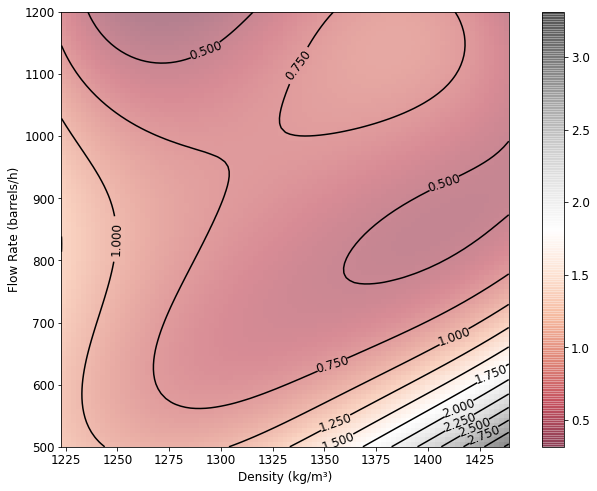

In [ ]:
plt.figure(figsize=(12,8))
hfont = {'fontname':'Times New Rome'}

contours = plt.contour(dens, flow, incr100, 13, colors='black',linestyles='solid')
plt.clabel(contours, inline=True, fontsize=12)

#ax = plt.subplot()
im=plt.imshow(incr100, extent=[1223, 1439, 500, 1200], aspect=0.30, origin='lower',cmap='RdGy', alpha=0.5)
#plt.imshow(incr, origin='lower',cmap='RdGy', alpha=0.5)

cbar = plt.colorbar(im)
cbar.ax.tick_params(labelsize=12)

plt.xlabel('Density (kg/m³)', **hfont, fontsize=12)
plt.ylabel('Flow Rate (barrels/h)', **hfont, fontsize=12)

import matplotlib.pyplot as plt

plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)

#contours.set_ylabel('Flow rate (barrels/h)',fontsize=12)
#contours.set_xlabel('Density (kg/m³)',fontsize=12)
#plt.colorbar()

plt.savefig('100m.png', dpi=1000)
#plt.savefig("10m.pdf", bbox_inches='tight')
from google.colab import files
files.download("100m.png") 

plt.show()